### SimpleImputer: same procedures on different features

## Mean / Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note the following**:

- If a variable is normally distributed, the mean, median and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for  numerical variables.
- If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
- For discrete variables casted as 'int' (to save memory), the mean may not be an integer, therefore the whole variable will be re-casted as 'float'. In order to avoid this behaviour, we can replace NA with the median instead. The median will inevitably be an integer / discrete value as well.


### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)

If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)

### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.


### When to use mean / median imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even in those cases when data is not MCAR and there are a lot of missing values. The reason behind this, is the simplicity of the technique.


### Final note

Replacement of NA with mean / median is widely used in the data science community and in various data science competitions. See for example the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean / median imputation is done together with adding a binary "missing indicator" variable to capture those observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean /median imputation, and if it wasn't this would be captured by the additional "missing indicator" variable. Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.


We will perform mean and median imputation using pandas on the auto-mpg Datasets.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\auto-mpg.csv')

In [3]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,NaN,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,NaN,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,NaN,10.5,70,1,ford torino


In [4]:
# let's check the null values
data.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.022613
acceleration    0.082915
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

The variables with missing data are:horsepower, wight and acceleration
therefore the imputation will be done to only these variables


### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [5]:
inputs = data.drop(['mpg'], axis = 1)

In [6]:
target = data['mpg']

In [7]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,  # predictors
    target,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((278, 8), (120, 8))

In [8]:
# let's check the misssing data again
X_train.isnull().mean()

cylinders       0.000000
displacement    0.000000
horsepower      0.017986
weight          0.021583
acceleration    0.086331
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

In [9]:
# selecting the numerical values to be imputed 
imp_variables = ['horsepower', 'weight', 'acceleration']


In [10]:
X_train[imp_variables].head()

,horsepower,weight,acceleration
230,170.0,4165.0,NaN
357,100.0,2615.0,14.8
140,150.0,4257.0,15.5
22,95.0,2375.0,17.5
250,140.0,3735.0,13.2


### SimpleImputer: same procedures on different features

In [11]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train[imp_variables])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

**Note, if you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'**

In [12]:
# we can look at the learned medians like this:
imputer.statistics_

array([  95. , 2845. ,   15.5])

In [13]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
X_train[imp_variables].median()

horsepower        95.0
weight          2845.0
acceleration      15.5
dtype: float64

**Note** that SimpleImputer learns the medians of all the numerical variables in the dataset, those with NA and those without NA.

We make a copy of the numerical variables of X_train because first, we can impute only the numerical variables and second we want to compare the dataset before and after the imputation.

In [14]:
X_train_imp = X_train[imp_variables].copy()

In [15]:
imp = imputer.transform(X_train_imp)

In [16]:
# encode the train set back to a dataframe

In [17]:
X_train_imp = pd.DataFrame(data = imp, columns = imp_variables, index = X_train_imp.index)

In [18]:
X_train_imp

,horsepower,weight,acceleration
230,170.0,4165.0,15.5
357,100.0,2615.0,14.8
140,150.0,4257.0,15.5
22,95.0,2375.0,17.5
250,140.0,3735.0,13.2
...,...,...,...
323,105.0,2800.0,14.4
192,105.0,3353.0,14.5
117,49.0,1867.0,19.5
47,100.0,3282.0,15.0


In [19]:
# to confirm that there are not null values
X_train_imp.isnull().sum()

horsepower      0
weight          0
acceleration    0
dtype: int64

In [20]:
# checking how the imputation changed the X_train dataset

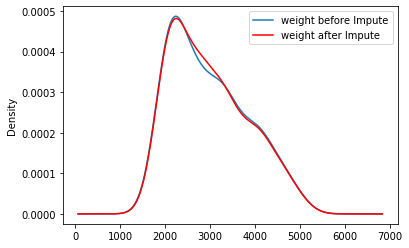

In [21]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['weight'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train_imp['weight'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('weight before Impute', 'weight after Impute'), loc='best')

In [22]:
# we can see that the distribution has not changed too much

In [23]:
print('Original variable variance of weight: ', X_train.weight.var())
print('Variance after median imputation of weight: ', X_train_imp.weight.var())


Original variable variance of weight:  724621.5901888431
Variance after median imputation of weight:  709319.1617796009


For the variable weight the variance did not change too much

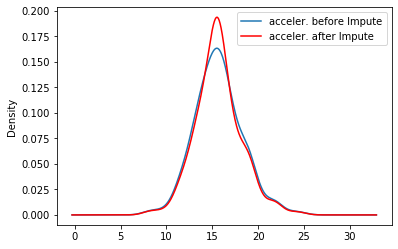

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['acceleration'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train_imp['acceleration'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('acceler. before Impute', 'acceler. after Impute'), loc='best')

In [25]:
# we can see that the distribution has not changed too much
# with now more values accumulating a litle towards the median/mean

In [26]:

print('Original variable variance of acceleration: ', X_train.acceleration.var())
print('Variance after median imputation of acceleration: ', X_train_imp.acceleration.var())

Original variable variance of acceleration:  6.74251859574866
Variance after median imputation of acceleration:  6.160982390982522


For the variable acceleration the variance did not change too much

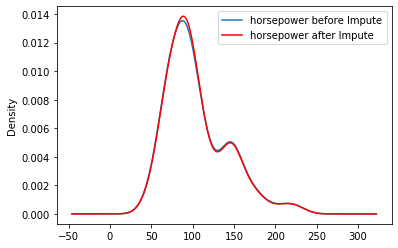

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['horsepower'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train_imp['horsepower'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('horsepower before Impute', 'horsepower after Impute'), loc='best')

we can see that the distribution has not changed too much for the horsepower

In [28]:
print('Original variable variance of horsepower: ', X_train.horsepower.var())
print('Variance after median imputation of horsepower: ', X_train_imp.horsepower.var())

Original variable variance of horsepower:  1380.6524994613228
Variance after median imputation of horsepower:  1357.3486741292886


For the variable acceleration the variance did not change too much

Now we do median imputation to the X_test using the means founded in the X_train

In [29]:
X_test_imp = X_test[imp_variables]

In [30]:
X_test_imp.head()

,horsepower,weight,acceleration
65,153.0,4129.0,13.0
132,75.0,2542.0,17.0
74,140.0,4294.0,16.0
78,87.0,2979.0,NaN
37,100.0,NaN,15.5


In [31]:
X_test_imp.horsepower = X_test_imp.horsepower.fillna(X_train_imp.horsepower.median())
X_test_imp.weight = X_test.weight.fillna(X_train_imp.weight.median())
X_test_imp.acceleration = X_test.acceleration.fillna(X_train_imp.acceleration.median())

C:\Users\gusal\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
X_test_imp.head()

,horsepower,weight,acceleration
65,153.0,4129.0,13.0
132,75.0,2542.0,17.0
74,140.0,4294.0,16.0
78,87.0,2979.0,15.5
37,100.0,2845.0,15.5


In [33]:
# checking how the imputation changed the X_test dataset

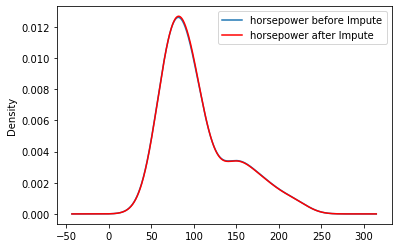

In [34]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_test['horsepower'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_test_imp['horsepower'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('horsepower before Impute', 'horsepower after Impute'), loc='best')

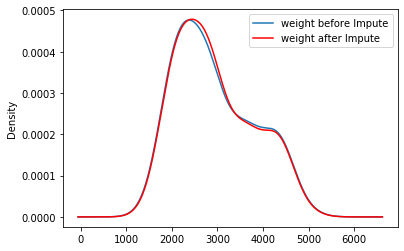

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_test['weight'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_test_imp['weight'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('weight before Impute', 'weight after Impute'), loc='best')

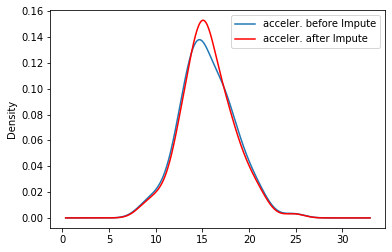

In [36]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_test['acceleration'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_test_imp['acceleration'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ('acceler. before Impute', 'acceler. after Impute'), loc='best')

In [37]:
# we can see that the distribution for acceleration has not changed too much
# with now more values accumulating a litle towards close to the median/mean

The changes after the imputation in the X_test are very simmilar that we obtained for the X_train

In [ ]:
now we replace the numerical values of X_test with X_test_imp 

In [47]:
X_test[imp_variables] = X_test_imp[imp_variables]

In [48]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
65,8,351.0,153.0,4129.0,13.0,72,1,ford galaxie 500
132,4,140.0,75.0,2542.0,17.0,74,1,chevrolet vega
74,8,302.0,140.0,4294.0,16.0,72,1,ford gran torino (sw)
78,4,120.0,87.0,2979.0,15.5,72,2,peugeot 504 (sw)
37,6,232.0,100.0,2845.0,15.5,71,1,amc matador


In [40]:
#checking there are not null values
X_test.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

replacing the original variables for the now imputed variables in X-train

In [41]:
X_train[imp_variables] = X_train_imp[imp_variables]

In [42]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
230,8,350.0,170.0,4165.0,15.5,77,1,chevrolet monte carlo landau
357,4,119.0,100.0,2615.0,14.8,81,3,datsun 200sx
140,8,304.0,150.0,4257.0,15.5,74,1,amc matador (sw)
22,4,104.0,95.0,2375.0,17.5,70,2,saab 99e
250,8,318.0,140.0,3735.0,13.2,78,1,dodge diplomat
...,...,...,...,...,...,...,...,...
323,4,156.0,105.0,2800.0,14.4,80,1,dodge colt
192,6,250.0,105.0,3353.0,14.5,76,1,chevrolet nova
117,4,68.0,49.0,1867.0,19.5,73,2,fiat 128
47,6,250.0,100.0,3282.0,15.0,71,1,pontiac firebird


In [43]:
X_train.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different procedures on different features
### see Mean-Median-Imputation-Sklearn_SimpleImputer_2


On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer. 

**Note** ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

 